# The Recommender Engine Pool

*What is a recommender engine pool?*


The recommender engine pool is the data source from which the recommender engine gets its recommendations. It is made up of the (1)items considered for the recommendation and (2) measure/s that determines its fitness to be recommended.

We will create a Spotify track recommendation pool based on its genre.

## Tracks Genre Classification

- What does each playlist set sound like? What are their defining characteristics?

- Using user-marked playlist genres as training data, can we build a model to correctly classify songs from a separate track dataset?

In [56]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Read the training data

In [57]:
genre_names = ["pinoy indie", "pinoy rock"]

playlist_df_list = []
track_df_list = []
for genre in genre_names:
    # read and process the playlist data for keyword
    print(genre)
    pdf = pd.read_csv('../data/'+genre.lower()+'_playlist_data.csv')
    pdf['genre'] = genre.lower().replace('&','n')
    playlist_df_list.append(pdf)

    tdf = pd.read_csv('../data/'+genre.lower()+'_playlist_tracks_data.csv')
    tdf['genre'] = genre.lower().replace('&','n')
    tdf = tdf.drop(columns=['playlist_name'])
    tdf = tdf.merge(pdf[['playlist_id','playlist_name']], on=['playlist_id'], how='left')
    
    track_df_list.append(tdf)
    
    
        
playlist_df = pd.concat(playlist_df_list)
tracks_df = pd.concat(track_df_list)


pinoy indie
pinoy rock


In [58]:
tracks_df['genre'].value_counts()

pinoy rock     1907
pinoy indie    1582
Name: genre, dtype: int64

In [59]:
#check shape
playlist_df.shape, tracks_df.shape

((94, 7), (3489, 22))

In [60]:
#check columns
print("Playlist dataset columns: %s \n" % playlist_df.columns.values)
print("Tracks dataset columns: %s" % tracks_df.columns.values)

Playlist dataset columns: ['playlist_id' 'playlist_name' 'playlist_total_tracks' 'owner_id'
 'owner_name' 'total_followers' 'genre'] 

Tracks dataset columns: ['track_id' 'track_name' 'artist_id' 'artist_name' 'album_id' 'duration'
 'release_date' 'popularity' 'danceability' 'energy' 'key' 'loudness'
 'mode' 'speechiness' 'acousticness' 'instrumentalness' 'liveness'
 'valence' 'tempo' 'playlist_id' 'genre' 'playlist_name']


In [61]:
playlist_df

,playlist_id,playlist_name,playlist_total_tracks,owner_id,owner_name,total_followers,genre
0,37i9dQZF1DX6oLdwrroY56,Pinoy Indie Mix,75,spotify,Spotify,132984,pinoy indie
1,79OG7felavmRSLh1UpYBSO,Pinoy Indie Faves,589,kneecoaleee,Nicole Mortel,1381,pinoy indie
2,5166vpEenpiy4kVU9XafbS,The Sound of Pinoy Indie,304,thesoundsofspotify,The Sounds of Spotify,815,pinoy indie
3,1AzsgYSCBxajAzN6ehh4iB,Tagalog OPM Indie songs that make me feel like...,162,12144453799,Israel,736,pinoy indie
4,1lPGwNeoeAnHnczT5iEQGT,Pinoy Indie Bands,284,226dgzcdw37p7jnto72iforjy,Clarizza Mae Santos,298,pinoy indie
...,...,...,...,...,...,...,...
28,1McHDl8MxeLNpfnRBnuww4,Pinoy Rock TOP 200,171,12136338347,Allen MacRandel,81,pinoy rock
29,2pKS0GuGPAYlOHA4CIXzxZ,Pinoy Rockstar,55,zy7hcl2p4suea2hbhmbsw1j64,ac,44,pinoy rock
30,6fpUP9Sydue172zINn1y9U,LAKLAK PINOY ROCK,21,gdgarcila,gdgarcila,30,pinoy rock
31,6g5RQVCElCcmbTxWsC3VB6,PINOY ROCK BANDS SONGS,279,sag66rebwusx5tnz89zw35kpy,ITOY,28,pinoy rock


In [62]:
#check null rows
playlist_df[playlist_df.isnull().any(1)]
tracks_df[tracks_df.isnull().any(1)]

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,genre,playlist_name
0,2g6Wkzji3cHY6NLghAo4eY,Matulog ka na,6QS0EHo0EInPROmIqLIBGd,Clayson,5yqsmaQV33Ak9EDzKPfFzo,279106,2021-01-22,29,0.475,0.157,...,1,0.0307,0.785,0.002120,0.1070,0.0806,119.836,2g6Wkzji3cHY6NLghAo4eY,pinoy indie,NaN
1,78heomO2buqJes1Zf5IOdf,Kwentuhan,3Hvxz2oZPYuo61ChHKcqQI,Autotelic,2AIsdW4H6Yy5XiMHh4ztS0,269333,2021-01-22,37,0.406,0.742,...,1,0.0356,0.215,0.000410,0.0943,0.5640,179.959,78heomO2buqJes1Zf5IOdf,pinoy indie,NaN
2,2AyWbcZ3SZcHphIUktXaBK,Take Me for Awhile,62BlzCSrFVs8LktOArIoDW,darwin navarro,3WK4OYJfkt6jzGhla4JxJm,242620,2021-01-22,25,0.523,0.759,...,1,0.0295,0.011,0.000769,0.1090,0.6030,90.026,2AyWbcZ3SZcHphIUktXaBK,pinoy indie,NaN
3,3kb7ReTd6zyMENiL5WU30j,Stranger Now,4sKYcezEK11EMLONEhInb0,Marion Talavera,5SA0GFx1h3s0goizmFD0xj,201663,2020-04-10,46,0.603,0.196,...,1,0.0443,0.940,0.000001,0.0916,0.1600,119.529,3kb7ReTd6zyMENiL5WU30j,pinoy indie,NaN
4,1ahsxpljrkm4Go3xkGHgGS,weathering with u,2ZNeBokyn4VOYpbQa5rcuY,Kenneth Amores,4Sdi9qhC4A35TDu2SKaGK5,256713,2021-01-08,30,0.385,0.233,...,0,0.0358,0.937,0.002000,0.0695,0.1800,78.666,1ahsxpljrkm4Go3xkGHgGS,pinoy indie,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,3aUGVfyoxdcNpa46iBuHp9,"Sana - Love Theme From ""Captain Barbell""",2TnJoEY5ctCfKaCwosowyY,Shamrock,2gk2n4QVbkF6xEExoTKV4m,219240,2005,38,0.622,0.284,...,1,0.0325,0.855,0.000000,0.1070,0.3760,73.932,3aUGVfyoxdcNpa46iBuHp9,pinoy rock,NaN
1903,01JA3812vd07F37zz6G3B2,Haplos,2TnJoEY5ctCfKaCwosowyY,Shamrock,7aRIdqhVpc1VujEMX501my,198506,2007,36,0.668,0.328,...,1,0.0284,0.767,0.000000,0.1000,0.1930,119.813,01JA3812vd07F37zz6G3B2,pinoy rock,NaN
1904,6dowxGmsSqAJIubRzJEaOK,Kung Mali Ako,6YZTEomzD07A4JNhN6E8AV,Kate Torralba,5vb4OPaYIp67Enj8wWck8J,200186,2013-01-01,0,0.398,0.372,...,1,0.0319,0.529,0.002270,0.2710,0.5200,99.946,6dowxGmsSqAJIubRzJEaOK,pinoy rock,NaN
1905,4UOfFouPDw0AqVWijbW2ea,Umaapaw,7goaQP1sgbWsKOjrHenxFJ,Ang Bandang Shirley,7s3E53Kp9elnqtLEuaJLDA,222398,2017-03-25,35,0.347,0.674,...,1,0.0349,0.260,0.000502,0.2490,0.2300,120.145,4UOfFouPDw0AqVWijbW2ea,pinoy rock,NaN


In [45]:
# How many unique tracks are in the combined dataset?
len(tracks_df['track_id'].unique())

3379

In [46]:
tracks_df

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,genre
0,2g6Wkzji3cHY6NLghAo4eY,Matulog ka na,6QS0EHo0EInPROmIqLIBGd,Clayson,5yqsmaQV33Ak9EDzKPfFzo,279106,2021-01-22,29,0.475,0.157,...,-13.932,1,0.0307,0.785,0.002120,0.1070,0.0806,119.836,2g6Wkzji3cHY6NLghAo4eY,pinoy indie
1,78heomO2buqJes1Zf5IOdf,Kwentuhan,3Hvxz2oZPYuo61ChHKcqQI,Autotelic,2AIsdW4H6Yy5XiMHh4ztS0,269333,2021-01-22,37,0.406,0.742,...,-3.135,1,0.0356,0.215,0.000410,0.0943,0.5640,179.959,78heomO2buqJes1Zf5IOdf,pinoy indie
2,2AyWbcZ3SZcHphIUktXaBK,Take Me for Awhile,62BlzCSrFVs8LktOArIoDW,darwin navarro,3WK4OYJfkt6jzGhla4JxJm,242620,2021-01-22,25,0.523,0.759,...,-5.652,1,0.0295,0.011,0.000769,0.1090,0.6030,90.026,2AyWbcZ3SZcHphIUktXaBK,pinoy indie
3,3kb7ReTd6zyMENiL5WU30j,Stranger Now,4sKYcezEK11EMLONEhInb0,Marion Talavera,5SA0GFx1h3s0goizmFD0xj,201663,2020-04-10,46,0.603,0.196,...,-14.843,1,0.0443,0.940,0.000001,0.0916,0.1600,119.529,3kb7ReTd6zyMENiL5WU30j,pinoy indie
4,1ahsxpljrkm4Go3xkGHgGS,weathering with u,2ZNeBokyn4VOYpbQa5rcuY,Kenneth Amores,4Sdi9qhC4A35TDu2SKaGK5,256713,2021-01-08,30,0.385,0.233,...,-16.567,0,0.0358,0.937,0.002000,0.0695,0.1800,78.666,1ahsxpljrkm4Go3xkGHgGS,pinoy indie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,3aUGVfyoxdcNpa46iBuHp9,"Sana - Love Theme From ""Captain Barbell""",2TnJoEY5ctCfKaCwosowyY,Shamrock,2gk2n4QVbkF6xEExoTKV4m,219240,2005,38,0.622,0.284,...,-7.574,1,0.0325,0.855,0.000000,0.1070,0.3760,73.932,3aUGVfyoxdcNpa46iBuHp9,pinoy rock
1903,01JA3812vd07F37zz6G3B2,Haplos,2TnJoEY5ctCfKaCwosowyY,Shamrock,7aRIdqhVpc1VujEMX501my,198506,2007,36,0.668,0.328,...,-8.232,1,0.0284,0.767,0.000000,0.1000,0.1930,119.813,01JA3812vd07F37zz6G3B2,pinoy rock
1904,6dowxGmsSqAJIubRzJEaOK,Kung Mali Ako,6YZTEomzD07A4JNhN6E8AV,Kate Torralba,5vb4OPaYIp67Enj8wWck8J,200186,2013-01-01,0,0.398,0.372,...,-8.095,1,0.0319,0.529,0.002270,0.2710,0.5200,99.946,6dowxGmsSqAJIubRzJEaOK,pinoy rock
1905,4UOfFouPDw0AqVWijbW2ea,Umaapaw,7goaQP1sgbWsKOjrHenxFJ,Ang Bandang Shirley,7s3E53Kp9elnqtLEuaJLDA,222398,2017-03-25,35,0.347,0.674,...,-5.019,1,0.0349,0.260,0.000502,0.2490,0.2300,120.145,4UOfFouPDw0AqVWijbW2ea,pinoy rock


In [47]:
#retain only distinct tracks per keyword
tracks_df =tracks_df.drop_duplicates(subset='track_id')
tracks_df.shape

(3379, 21)

<AxesSubplot:>

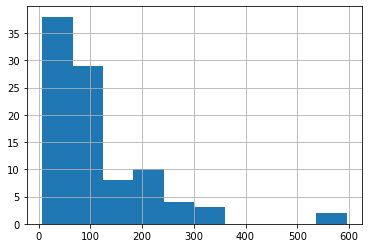

In [48]:
# What is the distribution of playlist's total tracks?
playlist_df['playlist_total_tracks'].hist()

<AxesSubplot:>

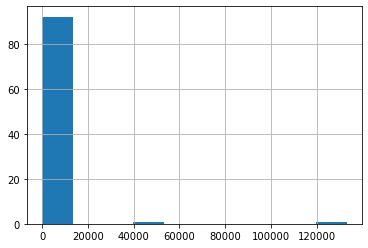

In [49]:
# What is the distribution of playlist's total tracks?
playlist_df['total_followers'].hist()

In [50]:
#tally of tracks
#tracks_df['genre'].value_counts()
tracks_df['genre'].value_counts(normalize=True)

pinoy rock     0.531814
pinoy indie    0.468186
Name: genre, dtype: float64

## 3. Feature Engineering

##### Conversions/Normalizations

In [66]:
#convert duration from ms to mins
tracks_df['duration_mins']=tracks_df['duration']/60000

In [67]:
#Normalize loudness
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

tracks_df['loudness'] = scaler.fit_transform(tracks_df[['loudness']])
tracks_df['loudness'].describe()


count    3489.000000
mean        0.749219
std         0.121023
min         0.000000
25%         0.684575
50%         0.769799
75%         0.836574
max         1.000000
Name: loudness, dtype: float64

In [68]:
#Normalize tempo
tracks_df['tempo'] =  scaler.fit_transform(tracks_df[['tempo']])
#check
tracks_df['tempo'].describe()


count    3489.000000
mean        0.568461
std         0.137745
min         0.000000
25%         0.457325
50%         0.573962
75%         0.661914
max         1.000000
Name: tempo, dtype: float64

###### Categorical Encoding

In [70]:
tracks_df["genre"] = tracks_df["genre"].astype('category')
tracks_df.dtypes

track_id              object
track_name            object
artist_id             object
artist_name           object
album_id              object
duration               int64
release_date          object
popularity             int64
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
playlist_id           object
genre               category
playlist_name         object
duration_mins        float64
dtype: object

In [71]:
tracks_df['genre'].value_counts()

pinoy rock     1907
pinoy indie    1582
Name: genre, dtype: int64

In [72]:
tracks_df['genre_id'] = tracks_df["genre"].cat.codes
tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,genre,playlist_name,duration_mins,genre_id
0,2g6Wkzji3cHY6NLghAo4eY,Matulog ka na,6QS0EHo0EInPROmIqLIBGd,Clayson,5yqsmaQV33Ak9EDzKPfFzo,279106,2021-01-22,29,0.475,0.157,...,0.785,0.002120,0.1070,0.0806,0.554961,2g6Wkzji3cHY6NLghAo4eY,pinoy indie,NaN,4.651767,0
1,78heomO2buqJes1Zf5IOdf,Kwentuhan,3Hvxz2oZPYuo61ChHKcqQI,Autotelic,2AIsdW4H6Yy5XiMHh4ztS0,269333,2021-01-22,37,0.406,0.742,...,0.215,0.000410,0.0943,0.5640,0.833390,78heomO2buqJes1Zf5IOdf,pinoy indie,NaN,4.488883,0
2,2AyWbcZ3SZcHphIUktXaBK,Take Me for Awhile,62BlzCSrFVs8LktOArIoDW,darwin navarro,3WK4OYJfkt6jzGhla4JxJm,242620,2021-01-22,25,0.523,0.759,...,0.011,0.000769,0.1090,0.6030,0.416911,2AyWbcZ3SZcHphIUktXaBK,pinoy indie,NaN,4.043667,0
3,3kb7ReTd6zyMENiL5WU30j,Stranger Now,4sKYcezEK11EMLONEhInb0,Marion Talavera,5SA0GFx1h3s0goizmFD0xj,201663,2020-04-10,46,0.603,0.196,...,0.940,0.000001,0.0916,0.1600,0.553539,3kb7ReTd6zyMENiL5WU30j,pinoy indie,NaN,3.361050,0
4,1ahsxpljrkm4Go3xkGHgGS,weathering with u,2ZNeBokyn4VOYpbQa5rcuY,Kenneth Amores,4Sdi9qhC4A35TDu2SKaGK5,256713,2021-01-08,30,0.385,0.233,...,0.937,0.002000,0.0695,0.1800,0.364302,1ahsxpljrkm4Go3xkGHgGS,pinoy indie,NaN,4.278550,0


In [73]:
genre_lookup = dict(tracks_df.groupby('genre_id').head(1)[['genre_id','genre']].values)
genre_lookup

{0: 'pinoy indie', 1: 'pinoy rock'}

## 4. Train a KNN model

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, classification_report

Tuning the model


Tuning kNN classification model with K-Fold=4...
Shape of X_Train:(2791, 9)
Shape of y_Train:(2791,)
Shape of X_Test:(698, 9)
Shape of y_Test:(698,)
Finding best k...


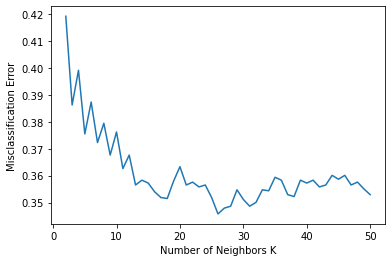

The optimal number of neighbors is 26 with score 65%

Tuning kNN classification model with K-Fold=5...
Shape of X_Train:(2791, 9)
Shape of y_Train:(2791,)
Shape of X_Test:(698, 9)
Shape of y_Test:(698,)
Finding best k...


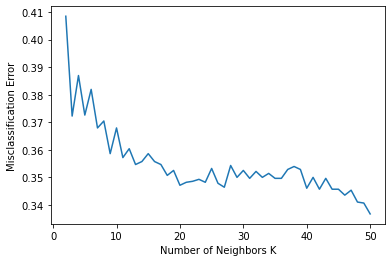

The optimal number of neighbors is 50 with score 66%

Tuning kNN classification model with K-Fold=8...
Shape of X_Train:(2791, 9)
Shape of y_Train:(2791,)
Shape of X_Test:(698, 9)
Shape of y_Test:(698,)
Finding best k...


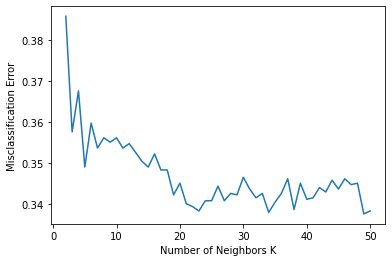

The optimal number of neighbors is 49 with score 66%

Tuning kNN classification model with K-Fold=10...
Shape of X_Train:(2791, 9)
Shape of y_Train:(2791,)
Shape of X_Test:(698, 9)
Shape of y_Test:(698,)
Finding best k...


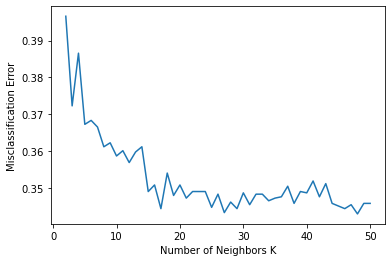

The optimal number of neighbors is 48 with score 65%


In [75]:
#Select audio features to use for the model
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']
results_optimal_k = []

kfolds= [4,5,8,10]

for d in kfolds:
    print('\nTuning kNN classification model with K-Fold=%d...' % d)
    # create feature matrix (X)
    X = tracks_df[feature_cols]
    y = tracks_df['genre_id']

    # creating training set, test set and checking shapes 
    X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2)
    print("Shape of X_Train:"+str(X_train.shape))
    print("Shape of y_Train:"+str(Y_train.shape))
    print("Shape of X_Test:"+str(X_test.shape))
    print("Shape of y_Test:"+str(Y_test.shape))
    
    #train model
    cv_scores = []
    neighbors=np.arange(2,51)
    print('Finding best k...')
    
    #Perform KNN using K= [1..50] and validate using k-fold k = 5
    for k in neighbors:
        #print('Fitting for k=%d' % k)
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, Y_train, cv=d, scoring='accuracy')
        cv_scores.append(scores.mean())
        
    # changeto misclassification error
    mse = [1 - x for x in cv_scores]

    # determining best k
    optimal_k = neighbors[mse.index(min(mse))]
    results_optimal_k.append(optimal_k)
    
    knn_optimal = KNeighborsClassifier(n_neighbors=k)
    knn_optimal.fit(X, y)
    # plot misclassification error vs k
    plt.plot(neighbors, mse)
    plt.xlabel("Number of Neighbors K")
    plt.ylabel("Misclassification Error")
    plt.show()
    
    print("The optimal number of neighbors is %d with score %d%%" % (optimal_k, 100*(1-min(mse))))


In [76]:
#results_optimal_k = [38, 33, 17, 21, 13, 46, 26, 27, 10, 26]
results_optimal_k

[26, 50, 49, 48]

## 5. Model Prediction

In [79]:
## 2. Input Seed Track


df_discography = pd.read_csv('../data/artist_discography.csv')
df_streams = pd.read_csv('../data/artist_top_tracks_streams.csv')
df_features = pd.read_csv('../data/artist_data_lola_amour.csv')

df_features['loudness'] = scaler.fit_transform(df_features[['loudness']])
df_features['tempo'] =  scaler.fit_transform(df_features[['tempo']])

df_discography.head()

df_streams.head()

df_features.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,track_popularity,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers,genres,artist_popularity
0,2pGH2MRfqXyFJtVPVBZ7Gx,Pwede Ba,29zSTMejPhY0m7kwNQ9SPI,Lola Amour,652wi7TL70B3QnNE2wwDSN,342806,2018-06-15,53,0.665,0.325,...,1,0.0544,0.607,0.000429,0.1050,0.253,0.000000,75309,"['pinoy indie', 'pinoy rock']",48
1,0HAciULA3lNbyp0kCBrJnC,Maybe Maybe,29zSTMejPhY0m7kwNQ9SPI,Lola Amour,5eawUz4lU3YG3j79LhubBG,313500,2017-05-16,42,0.648,0.316,...,1,0.0277,0.434,0.000013,0.1230,0.308,0.350855,75309,"['pinoy indie', 'pinoy rock']",48
2,72Xg79Z8uWLh48nKxuqwVF,No Tomorrow,29zSTMejPhY0m7kwNQ9SPI,Lola Amour,5eawUz4lU3YG3j79LhubBG,188000,2017-05-16,34,0.624,0.379,...,1,0.0332,0.656,0.000000,0.3200,0.487,0.224360,75309,"['pinoy indie', 'pinoy rock']",48
3,6Te15Q7bPL0S6jPg5KzZQT,Please Don’t Leave,29zSTMejPhY0m7kwNQ9SPI,Lola Amour,5ft2hxnN8ZiOiusjSK3d1h,159493,2020-11-12,32,0.462,0.169,...,1,0.0309,0.967,0.000000,0.1180,0.343,1.000000,75309,"['pinoy indie', 'pinoy rock']",48
4,0hBksOFr0Fs5mWLOliuD06,Sanity,29zSTMejPhY0m7kwNQ9SPI,Lola Amour,2uX28zFrqZw4IbzsaEYaDm,223802,2019-05-17,35,0.724,0.571,...,0,0.0396,0.159,0.000000,0.0613,0.775,0.367957,75309,"['pinoy indie', 'pinoy rock']",48


Test the model with external data by predicting the genres of the spotify charting tracks!

In [83]:
#Predict genres of the spotify charts
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']
genres = [genre_lookup[i] for i in np.arange(len(genre_names))]

n=3 #pick kfold=10
print("Predicting with optimal k: %d" %(results_optimal_k[n]))

knn_optimal = KNeighborsClassifier(n_neighbors=results_optimal_k[n])
X_train = tracks_df[feature_cols]
y_train = tracks_df['genre_id']

# creating training set, test set and checking shapes 
X_pred = df_features[feature_cols]
knn_optimal.fit(X_train, y_train)

y_pred = knn_optimal.predict(X_pred)
y_pred

Predicting with optimal k: 48


array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int8)

In [95]:
temp = knn_optimal.predict(X_train)
tracks_df['predicted_genre_id'] = temp
tracks_df['predicted_genre'] = tracks_df['predicted_genre_id'].apply(lambda x: 'pinoy rock' if x == 0 else 'pinoy indie')

In [90]:
df_features['predicted_genre_id'] = y_pred

In [93]:
df_features['predicted_genre'] = df_features['predicted_genre_id'].apply(lambda x: 'pinoy rock' if x == 0 else 'pinoy indie')

## 3. Explore Similarity Measures

In [100]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity

In [97]:
seed_track_data = df_features[df_features['track_name']=='Pwede Ba'].iloc[0]
seed_track_data[feature_cols]

danceability        0.665000
energy              0.325000
loudness            0.799229
speechiness         0.054400
acousticness        0.607000
instrumentalness    0.000429
liveness            0.105000
valence             0.253000
tempo               0.000000
Name: 0, dtype: object

##### Use audio features only

Euclidean

In [101]:
tracks_df['euclidean_dist'] = chart_tracks_df.apply(lambda x: euclidean_distances(x[feature_cols].values.reshape(-1, 1),\
                                                                  seed_track_data[feature_cols].values.reshape(-1, 1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = tracks_df[tracks_df['track_id']!=seed_track_data['track_id']].sort_values('euclidean_dist')[:10]
recommendation_df[['track_name','artist_name','euclidean_dist','predicted_genre_id']+feature_cols]

,track_name,artist_name,euclidean_dist,predicted_genre_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1452,Torete,Jensen & The Flips,0.000,0,0.615,0.389,0.769567,0.0269,0.428000,0.000000,0.1080,0.2190,0.426261
439,Call Me,Jess Connelly,0.000,1,0.446,0.479,0.698818,0.0570,0.261000,0.000002,0.1120,0.1250,0.395654
824,Arbitrary,Over October,0.000,0,0.590,0.442,0.788712,0.0274,0.761000,0.000069,0.1040,0.1730,0.518098
1703,Angels Do Weep,Oremuz,0.000,1,0.366,0.930,0.832566,0.0735,0.543000,0.000366,0.0533,0.0854,0.666647
824,Magkasuyo buong gabi,RICO J PUNO,0.000,1,0.382,0.702,0.812096,0.0591,0.370000,0.000000,0.1330,0.7050,0.682323
439,Lakas Tama,Siakol,0.000,1,0.522,0.911,0.807194,0.0458,0.016500,0.074100,0.0690,0.3890,0.640125
979,Together Forevers,Ang Bandang Shirley,0.000,1,0.401,0.881,0.892849,0.0371,0.021200,0.000001,0.1110,0.5890,0.672500
1452,Perslab,Hotdog,0.000,1,0.452,0.200,0.392799,0.0288,0.500000,0.000282,0.4200,0.3490,0.346589
979,Sabi Ko Na Nga Ba,Sheryl Cruz,0.000,0,0.579,0.381,0.681859,0.0286,0.769000,0.000005,0.0969,0.3870,0.351275
1135,Burning Streets of Love and Hate,Dicta License,0.001,1,0.362,0.895,0.853963,0.1070,0.000085,0.344000,0.1860,0.5570,0.513509


Manhattan

In [102]:
tracks_df['manhattan_dist'] = tracks_df.apply(lambda x: manhattan_distances(x[feature_cols].values.reshape(-1, 1),\
                                                                  seed_track_data[feature_cols].values.reshape(-1, 1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = tracks_df[tracks_df['track_id']!=seed_track_data['track_id']].sort_values('manhattan_dist')[:10]
recommendation_df[['track_name','artist_name','manhattan_dist','predicted_genre_id']+feature_cols]

,track_name,artist_name,manhattan_dist,predicted_genre_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
790,I'm Coming Home,Callalily,0.000,1,0.665,0.733,0.815177,0.0431,0.00388,0.003750,0.3820,0.651,0.624977
549,Life's A Joke (Acoustic),The Speaks,0.000,0,0.665,0.473,0.694810,0.0343,0.64000,0.000002,0.0771,0.619,0.508100
954,Picture Picture,Tanya Markova,0.000,1,0.665,0.720,0.874135,0.0297,0.01470,0.000003,0.3700,0.591,0.595519
398,Imprinted,Ysanygo,0.000,0,0.665,0.486,0.592163,0.0329,0.00828,0.003650,0.2740,0.299,0.546467
470,Picture Picture,Tanya Markova,0.000,1,0.665,0.720,0.874135,0.0297,0.01470,0.000003,0.3700,0.591,0.595519
1479,Alive,Route 83,0.000,0,0.665,0.665,0.789871,0.0390,0.39300,0.000034,0.1270,0.629,0.463341
318,Pwede Ba,Lola Amour,0.000,0,0.665,0.325,0.774701,0.0544,0.60700,0.000429,0.1060,0.253,0.368146
1546,Picture Picture,Tanya Markova,0.000,1,0.665,0.720,0.874135,0.0297,0.01470,0.000003,0.3700,0.591,0.595519
162,Wait,crwn,0.000,0,0.665,0.233,0.611242,0.4270,0.71200,0.000000,0.1120,0.354,0.569761
1237,Mamasyal Sa Pilipinas,JUAN DELA CRUZ BAND,0.001,1,0.666,0.348,0.522871,0.0633,0.06650,0.277000,0.1470,0.920,0.546667


Cosine

In [103]:
tracks_df['cosine_dist'] = tracks_df.apply(lambda x: 1-cosine_similarity(x[feature_cols].values.reshape(1, -1),\
                                                                  seed_track_data[feature_cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = tracks_df[tracks_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre_id']+feature_cols]

,track_name,artist_name,cosine_dist,predicted_genre_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
624,Circle,6cyclemind,0.034914,0,0.718,0.316,0.749031,0.0522,0.638,0.000001,0.1080,0.360,0.330251
318,Pwede Ba,Lola Amour,0.040076,0,0.665,0.325,0.774701,0.0544,0.607,0.000429,0.1060,0.253,0.368146
1337,Kaleidoscope World,Markki Stroem,0.040841,0,0.674,0.330,0.697724,0.0380,0.703,0.000006,0.0894,0.257,0.345181
1055,Balewala (Acoustic),Brisom,0.042001,0,0.648,0.298,0.811732,0.0307,0.785,0.000000,0.1150,0.187,0.356874
492,Gentlemen Don't,Gabe Bondoc,0.042859,0,0.701,0.365,0.745851,0.0358,0.593,0.000000,0.1080,0.298,0.374921
682,bruised,TALA,0.044050,0,0.669,0.459,0.757908,0.0640,0.767,0.013700,0.1750,0.298,0.370378
258,"Karma, Kill Me Now",Jensen & The Flips,0.044596,0,0.628,0.386,0.824352,0.0859,0.402,0.006880,0.0490,0.199,0.296204
715,Chicosci Vamprie Social Club,Chicosci,0.044799,0,0.676,0.318,0.760757,0.0300,0.792,0.000000,0.1510,0.369,0.370457
655,Untitled,Bamboo,0.045827,0,0.684,0.334,0.763804,0.0300,0.942,0.000006,0.1230,0.325,0.333585
836,iglap,syd hartha,0.046014,0,0.638,0.437,0.683581,0.0582,0.521,0.000003,0.2200,0.417,0.276364


View histograms of the 3 similarity measures

array([[<AxesSubplot:title={'center':'euclidean_dist'}>,
        <AxesSubplot:title={'center':'manhattan_dist'}>],
       [<AxesSubplot:title={'center':'cosine_dist'}>, <AxesSubplot:>]],
      dtype=object)

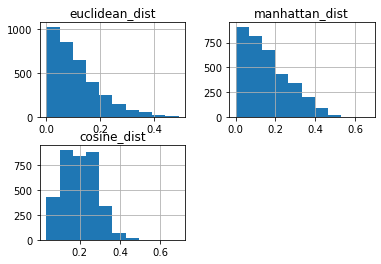

In [105]:
tracks_df[['euclidean_dist','manhattan_dist','cosine_dist']].hist()

In [110]:
tracks_df[tracks_df.index.duplicated()]

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,playlist_id,genre,playlist_name,duration_mins,genre_id,predicted_genre_id,predicted_genre,euclidean_dist,manhattan_dist,cosine_dist
0,21LMl54FIe7J5oOoZzgeiQ,Ang Huling El Bimbo,7374lH6kwx9uQATYQ9H3Cp,Eraserheads,2DIpgoeZAbwk3wF1qSDj8v,450333,2004-01-23,56,0.521,0.6260,...,21LMl54FIe7J5oOoZzgeiQ,pinoy rock,NaN,7.505550,1,1,pinoy indie,0.087,0.144,0.155755
1,3zuJmBQozBPx6KRlfCNUPQ,Himala,1ZTdxfZTeztyAgKUJVLxAI,Rivermaya,65GkUxR6lYlCiYP4mqyZl1,246280,2001,50,0.353,0.3160,...,3zuJmBQozBPx6KRlfCNUPQ,pinoy rock,NaN,4.104667,1,1,pinoy indie,0.307,0.312,0.319326
2,6SHSvo6OGgpneKfsxFGhhk,Ligaya,7374lH6kwx9uQATYQ9H3Cp,Eraserheads,2DIpgoeZAbwk3wF1qSDj8v,271466,2004-01-23,54,0.549,0.7180,...,6SHSvo6OGgpneKfsxFGhhk,pinoy rock,NaN,4.524433,1,1,pinoy indie,0.083,0.116,0.170875
3,3pGeMszs8vgG4osWUTMEk9,With A Smile,7374lH6kwx9uQATYQ9H3Cp,Eraserheads,2DIpgoeZAbwk3wF1qSDj8v,280546,2004-01-23,49,0.322,0.4820,...,3pGeMszs8vgG4osWUTMEk9,pinoy rock,NaN,4.675767,1,1,pinoy indie,0.003,0.343,0.184775
4,7uuirrtCr8O8fz7kQS6VUR,Pare Ko,7374lH6kwx9uQATYQ9H3Cp,Eraserheads,0HDclsvr13EmV3DBMSVWPX,325000,1993-12-01,56,0.479,0.4930,...,7uuirrtCr8O8fz7kQS6VUR,pinoy rock,NaN,5.416667,1,1,pinoy indie,0.118,0.186,0.287033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,6oX8JggiA4H3YBLDt3ZZXQ,Blood on the Road,4Q2YZhkJlMDsfRVP8myCUs,Mr Bones and The Boneyard Circus,4mhvJQC8CcOiiJ0udd4frw,243170,2018-03-15,0,0.507,0.9880,...,6oX8JggiA4H3YBLDt3ZZXQ,pinoy rock,NaN,4.052833,1,1,pinoy indie,0.145,0.158,0.273199
1578,5LMnvZ6JUQpQbaT0W8IczU,Nung Iniwan Mo Ako,30jFcaN8Gc1zXthGCdx41E,SinoSikat?,5q2xkf1NBoOvYm7roL4weI,254328,2013-01-31,15,0.544,0.0865,...,5LMnvZ6JUQpQbaT0W8IczU,pinoy rock,NaN,4.238800,1,0,pinoy rock,0.022,0.121,0.113811
1579,0Vp3NVkE4wcbN4nn4GiIxJ,Junkie Love,7aVzpSpuUtTXtaCpZCrE6J,Slowdough,3q7cCdyRRkexPu301W9gyx,350406,2017-12-10,0,0.524,0.6270,...,0Vp3NVkE4wcbN4nn4GiIxJ,pinoy rock,NaN,5.840100,1,0,pinoy rock,0.101,0.141,0.159178
1580,6NSu8vRJ3x8lgU2P6pLq94,D.O.T.S.,7aVzpSpuUtTXtaCpZCrE6J,Slowdough,3q7cCdyRRkexPu301W9gyx,302132,2017-12-10,0,0.589,0.6720,...,6NSu8vRJ3x8lgU2P6pLq94,pinoy rock,NaN,5.035533,1,1,pinoy indie,0.019,0.076,0.204167


In [114]:
tracks_df = tracks_df.reset_index().drop(columns=['index'])

## 4. Modify similarity criteria

##### Audio features and with same predicted genre

In [128]:
#get top 10 nearest to seed_track_data
recommendation_df = tracks_df[tracks_df['genre']=='pinoy rock']\
                                    [tracks_df['track_id']!=seed_track_data['track_id']]\
                                    .sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre']+feature_cols]
recommendation_df.to_csv('../data/recommended_pinoy_rock.csv')

<ipython-input-128-a4328b039fc4>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recommendation_df = tracks_df[tracks_df['genre']=='pinoy rock']\


In [131]:
recommendation_df.artist_name.unique()[:5]

array(['6cyclemind', 'Bamboo', 'Shamrock', 'Cinderella', 'Fred Engay'],
      dtype=object)

In [132]:
#get top 10 nearest to seed_track_data
recommendation_df = tracks_df[tracks_df['genre']=='pinoy indie']\
                                    [tracks_df['track_id']!=seed_track_data['track_id']]\
                                    .sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre']+feature_cols]
recommendation_df.to_csv('../data/recommended_pinoy_indie.csv')

<ipython-input-132-3be359b20ddd>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recommendation_df = tracks_df[tracks_df['genre']=='pinoy indie']\


In [134]:
recommendation_df.artist_name.unique()[:6]

array(['Lola Amour', 'Markki Stroem', 'Brisom', 'Gabe Bondoc', 'TALA',
       'Jensen & The Flips'], dtype=object)

In [23]:
chart_tracks_df.predicted_genre_id.value_counts()

0    467
1     18
Name: predicted_genre_id, dtype: int64

In [ ]:
df_feat## 3. Explore Similarity Measures

from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity


# Use only opm/pinoy tracks in top 200
df_artists = pd.read_csv('../data/spotify_daily_charts_artists.csv')
similar_artists = df_artists[(df_artists.genres.str.contains('opm|pinoy')) & (df_artists.genres.str.contains('indie|rock'))].artist_name.to_list()
non_similar_artists = df_artists[(df_artists.genres.str.contains('opm|pinoy')) & ~(df_artists.genres.str.contains('indie|rock'))].artist_name.to_list()
chart_tracks_df = chart_tracks_df[(chart_tracks_df.artist_name.isin(similar_artists)) | (chart_tracks_df.artist_name.isin(non_similar_artists))]

##### Use audio features only

Euclidean

chart_tracks_df['euclidean_dist'] = chart_tracks_df.apply(lambda x: euclidean_distances(x[feature_cols].values.reshape(-1, 1),\
                                                                  seed_track_data[feature_cols].values.reshape(-1, 1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('euclidean_dist')[:10]
recommendation_df[['track_name','artist_name','euclidean_dist','predicted_genre_id']+feature_cols]

Manhattan

chart_tracks_df['manhattan_dist'] = chart_tracks_df.apply(lambda x: manhattan_distances(x[feature_cols].values.reshape(-1, 1),\
                                                                  seed_track_data[feature_cols].values.reshape(-1, 1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('manhattan_dist')[:10]
recommendation_df[['track_name','artist_name','manhattan_dist','predicted_genre_id']+feature_cols]

Cosine

chart_tracks_df['cosine_dist'] = chart_tracks_df.apply(lambda x: 1-cosine_similarity(x[feature_cols].values.reshape(1, -1),\
                                                                  seed_track_data[feature_cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre_id']+feature_cols]

View histograms of the 3 similarity measures

chart_tracks_df[['euclidean_dist','manhattan_dist','cosine_dist']].hist()

## 4. Modify similarity criteria

##### Audio features and with same predicted genre

#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['predicted_genre_id']==0]\
                                    [chart_tracks_df['track_id']!=seed_track_data['track_id']]\
                                    .sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre_id']+feature_cols]

#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['predicted_genre_id']==1]\
                                    [chart_tracks_df['track_id']!=seed_track_data['track_id']]\
                                    .sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre_id']+feature_cols]



chart_tracks_df.predicted_genre_id.value_counts()